# 0. Packages and data

In [1]:
path='G:/Shared drives/BeStarsMiMeS/UpdatedFiles/' #Patrick's google file stream path

In [3]:
! git clone https://github.com/folsomcp/specpolFlow.git

fatal: destination path 'specpolFlow' already exists and is not an empty directory.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as const
import specpolFlow as pol

loading specpolFlow package


In [5]:
from matplotlib.backends.backend_pdf import PdfPages


In [6]:
import pandas as pd
sheet_id = '1M6y1Wnsrc-w5FjUMfKaSFa_-foIDAaMe8W4lYNWnWyk'
sheet_name = 'Stars'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
StarData=pd.read_csv(url)

sheet_name = 'Observations'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
Observations=pd.read_csv(url)

In [9]:
import itertools


### This gets rid of the warnings in the cells where it is creating more than 20 figures (i.e. 1.2)
#### Not needed for this notebook but could be useful in the future
#import warnings
#warnings.filterwarnings("default", message="More than 20 figures have been opened.")
models=['hybrid_maskdepth0.1_tellClean',
 'hybrid_maskdepth0.02_tellClean',
 'hybrid_CleanAsif+tellClean',
 'hybrid_CleanAsifTweak+tellClean',
 'normalized_maskdepth0.1_tellClean',
 'normalized_maskdepth0.02_tellClean',
 'normalized_CleanAsif+tellClean',
 'normalized_CleanAsifTweak+tellClean']

# 1. Comparison with Normal B Stars


In [ ]:
sheet_id = '1Hle6DgGcse92VdarqZma1nje5xYwlJwnAkMStMba1xU'
sheet_name = 'Bstars'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
StarData=pd.read_csv(url)
 
models=['hybrid_maskdepth0.1_tellClean',
 'hybrid_maskdepth0.02_tellClean',
 'hybrid_CleanAsif+tellClean',
 'hybrid_CleanAsifTweak+tellClean',
 'normalized_maskdepth0.1_tellClean',
 'normalized_maskdepth0.02_tellClean',
 'normalized_CleanAsif+tellClean',
 'normalized_CleanAsifTweak+tellClean']

#model=pd.read_csv('/content/drive/Shareddrives/BeStarsMiMeS/04-Bz-calculations/WellBehavedStars/{}_GOOD.csv'.format(models[0]))
model=pd.read_csv('{}04-Bz-calculations/{}.csv'.format(path,models[0]))
v_sig=np.abs(model['V bz sig (G)'])*3.0

Bstar_vsini=np.array([])
Bstar_Bz=np.array([])
for i in range(StarData['sigma'].size):
  if np.isnan(float(StarData['sigma'][i])):
    continue
  else:
    Bstar_Bz=np.append(Bstar_Bz,3*
    StarData['sigma'][i])
    Bstar_vsini=np.append(Bstar_vsini,StarData['vsini'][i])


MBstar_Bz=np.array([])
MBstar_vsini=np.array([])
for i in range(StarData['sigma'].size):
  if type(StarData['sigma'][i])!=str:
    if StarData['Det Flag'][i]!='ND':
      MBstar_Bz=np.append(MBstar_Bz,StarData['sigma'][i]*3)
      MBstar_vsini=np.append(MBstar_vsini,StarData['vsini'][i])

In [ ]:
print('B star 3sig Upper limit median',np.median(np.abs(Bstar_Bz)),'mean',np.mean(np.abs(Bstar_Bz)))
print('Magnetic B star 3sig Upper limit median',np.median(np.abs(MBstar_Bz)),'mean',np.mean(np.abs(MBstar_Bz)))
print('Be star 3sig Upper limit median',np.median(np.abs(v_sig)),'mean',np.mean(np.abs(v_sig)))
#np.median(v_sig)

MBstar_Bz.size

#not random sample --> detection bias

In [ ]:
#makes some histograms

for i in range(len(models)):

  #model=pd.read_csv('/content/drive/Shareddrives/BeStarsMiMeS/04-Bz-calculations/WellBehavedStars/{}_GOOD.csv'.format(models[i]))
  model=pd.read_csv('{}04-Bz-calculations/{}.csv'.format(path,models[i]))
  v_sig=np.abs(model['V bz sig (G)'])*3.0

  binwidth=50
  bins=np.arange(min(v_sig), max(v_sig) + binwidth, binwidth)
  
  #plt.hist(np.abs(Bstar_Bz),label='Normal B stars',bins=bins,color='#4daf4a',alpha=0.9)
  #plt.hist(v_sig,label='{}'.format(models[i]),bins=bins,alpha=0.9,color='#f781bf') 
  #plt.xlabel('$3\sigma_{Bz}$ Upper Limits',size=15)
  #plt.ylabel('Number of Stars',size=15)
  #plt.ylim(0,50)
  #plt.xlim(0,2000)
  #plt.title('3-sigma Upper limit (Scaled x- and y-axis)',size=15)
  #plt.legend()
  #plt.show()

 
  plt.hist(np.abs(Bstar_Bz),label='Normal B stars',bins=bins,color='#4daf4a',alpha=0.9)
  #plt.hist(v_sig,label='{}'.format(models[i]),bins=bins,alpha=0.9,color='#f781bf') 
  plt.hist(v_sig,label='{}'.format('Be stars'),bins=bins,alpha=0.9,color='#f781bf')

  plt.axvline(np.median(np.abs(Bstar_Bz)),color='darkgreen',linewidth=3,alpha=1,linestyle='dashed', label='Normal B Star Median')
  plt.axvline(np.mean(np.abs(Bstar_Bz)),color='darkgreen',linewidth=3,alpha=1,linestyle='solid', label='Normal B Star Mean')
  plt.axvline(np.median(np.abs(v_sig)),color='#984ea3',linewidth=3,alpha=1,linestyle='dashed', label='Be Star Median')
  plt.axvline(np.mean(np.abs(v_sig)),color='#984ea3',linewidth=3,alpha=1,linestyle='solid', label='Be Star Mean')

  plt.xlabel('$3\sigma_{Bz}$ Upper Limits (G)',size=15)
  plt.ylabel('Number of Stars',size=15)
  plt.ylim(0,40)
  plt.xlim(0,2000)
  plt.title('3-sigma Upper limit {}'.format(models[i]),size=15)
  plt.legend()
  plt.show()

'''
  plt.hist(np.abs(Bstar_Bz),label='Normal B stars',bins=bins,color='#4daf4a',alpha=0.9)
  plt.hist(v_sig,label='{}'.format(models[i]),bins=bins,alpha=0.9,color='#f781bf')
  plt.xlabel('$3\sigma_{Bz}$ Upper Limits',size=15)
  plt.ylabel('Number of Stars',size=15)
  plt.title('3-sigma Upper limit (No Scaling)',size=15)
  plt.legend()
  plt.show()


  plt.hist(np.abs(Bstar_Bz),label='Normal B stars',bins=bins,color='#4daf4a',alpha=0.9)
  plt.hist(v_sig,label='{}'.format(models[i]),bins=bins,alpha=0.9,color='#f781bf')
  plt.xlabel('$3\sigma_{Bz}$ Upper Limits',size=15)
  plt.ylabel('Number of Stars',size=15)
  plt.ylim(0,50)
  plt.title('3-sigma Upper limit (Scaled y-axis)',size=15)
  plt.legend()
  plt.show()
'''

In [ ]:
import pandas as pd
sheet_id = '1M6y1Wnsrc-w5FjUMfKaSFa_-foIDAaMe8W4lYNWnWyk'
sheet_name = 'Stars'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
StarData=pd.read_csv(url)

sheet_name = 'Observations'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
Observations=pd.read_csv(url)

In [ ]:
#makes some histograms


Bevsini=StarData['Adopted-vsini']

binwidth=50
bins=np.arange(0, max(Bevsini) + binwidth, binwidth)

plt.hist(np.abs(Bstar_vsini),label='Normal B stars',bins=bins,color='#4daf4a',alpha=0.9)
plt.hist(Bevsini,label='{}'.format('Be stars'),bins=bins,alpha=0.9,color='#f781bf')

#plt.hist(v_sig,label='{}'.format(models[i]),bins=bins,alpha=0.9,color='#f781bf') 
plt.axvline(np.median(np.abs(Bstar_vsini)),color='darkgreen',linewidth=3,alpha=1,linestyle='dashed', label='Normal B Star Median')
plt.axvline(np.mean(np.abs(Bstar_vsini)),color='darkgreen',linewidth=3,alpha=1,linestyle='solid', label='Normal B Star Mean')
plt.axvline(np.median(np.abs(Bevsini)),color='#984ea3',linewidth=3,alpha=1,linestyle='dashed', label='Be Star Median')
plt.axvline(np.mean(np.abs(Bevsini)),color='#984ea3',linewidth=3,alpha=1,linestyle='solid', label='Be Star Mean')

plt.xlabel('vsini [km/s]',size=15)
plt.ylabel('Number of Stars',size=15)
#plt.ylim(0,20)
#plt.xlim(0,2000)
#plt.title('vsini [km/s]',size=15)
plt.legend()
plt.show()

plt.hist(Bevsini,label='{}'.format('Be stars'),bins=bins,alpha=0.9,color='#f781bf')
plt.hist(np.abs(MBstar_vsini),label='Magnetic Normal B stars',bins=bins,color='#4daf4a',alpha=0.9)

#plt.hist(v_sig,label='{}'.format(models[i]),bins=bins,alpha=0.9,color='#f781bf') 
plt.axvline(np.median(np.abs(MBstar_vsini)),color='darkgreen',linewidth=3,alpha=1,linestyle='dashed', label='Magnetic Normal B Star Median')
plt.axvline(np.mean(np.abs(MBstar_vsini)),color='darkgreen',linewidth=3,alpha=1,linestyle='solid', label='Magnetic Normal B Star Mean')
plt.axvline(np.median(np.abs(Bevsini)),color='#984ea3',linewidth=3,alpha=1,linestyle='dashed', label='Be Star Median')
plt.axvline(np.mean(np.abs(Bevsini)),color='#984ea3',linewidth=3,alpha=1,linestyle='solid', label='Be Star Mean')
plt.xlabel('vsini [km/s]',size=15)
plt.ylabel('Number of Stars',size=15)
plt.ylim(0,40)
plt.xlim(0,520)
#plt.title('vsini [km/s]',size=15)
plt.legend()
plt.show()

# 2. Comparison with Normal B Stars (Well Behaved Stars)


In [ ]:
sheet_id = '1Hle6DgGcse92VdarqZma1nje5xYwlJwnAkMStMba1xU'
sheet_name = 'Bstars'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
StarData=pd.read_csv(url)

#model=pd.read_csv('/content/drive/Shareddrives/BeStarsMiMeS/04-Bz-calculations/WellBehavedStars/{}_GOOD.csv'.format(models[0]))
model=pd.read_csv('04-Bz-calculations/WellBehavedStars/{}_GOOD.csv'.format(models[0]))
v_sig=np.abs(model['V bz sig (G)'])*3.0

Bstar_vsini=np.array([])
Bstar_Bz=np.array([])
for i in range(StarData['sigma'].size):
  if np.isnan(StarData['sigma'][i]):
    continue
  else:
    Bstar_Bz=np.append(Bstar_Bz,3*
    StarData['sigma'][i])
    Bstar_vsini=np.append(Bstar_vsini,StarData['vsini'][i])


MBstar_Bz=np.array([])
MBstar_vsini=np.array([])
for i in range(StarData['sigma'].size):
  if type(StarData['sigma'][i])!=str:
    if StarData['Det Flag'][i]!='ND':
      MBstar_Bz=np.append(MBstar_Bz,StarData['sigma'][i]*3)
      MBstar_vsini=np.append(MBstar_vsini,StarData['vsini'][i])

In [ ]:
print('B star 3sig Upper limit median',np.median(np.abs(Bstar_Bz)),'mean',np.mean(np.abs(Bstar_Bz)))
print('Magnetic B star 3sig Upper limit median',np.median(np.abs(MBstar_Bz)),'mean',np.mean(np.abs(MBstar_Bz)))
print('Be star 3sig Upper limit median',np.median(np.abs(v_sig)),'mean',np.mean(np.abs(v_sig)))
#np.median(v_sig)

MBstar_Bz.size

#not random sample --> detection bias

In [ ]:
#makes some histograms

#model=pd.read_csv('/content/drive/Shareddrives/BeStarsMiMeS/04-Bz-calculations/WellBehavedStars/{}_GOOD.csv'.format(models[0]))
model=pd.read_csv('{}04-Bz-calculations/WellBehavedStars/{}_GOOD.csv'.format(path,models[0]))
v_sig=np.abs(model['V bz sig (G)'])*3.0
binwidth=50

bins=np.arange(min(v_sig), max(v_sig) + binwidth, binwidth)
plt.hist(np.abs(Bstar_Bz),label='Normal B stars',bins=bins,color='#4daf4a',alpha=0.9)
plt.hist(v_sig,label='{}'.format(models[0]),bins=bins,alpha=0.9,color='#f781bf')
#for i in range(MBstar_Bz.size):
#  plt.axvline(np.abs(MBstar_Bz[i]),color='C2',linewidth=1,alpha=0.5)
plt.xlabel('$3\sigma_{Bz}$ Upper Limits',size=15)
plt.ylabel('Number of Stars',size=15)
plt.ylim(0,50)
plt.xlim(0,2000)
plt.title('3-sigma Upper limit (Scaled x- and y-axis)',size=15)
plt.legend()
plt.show()


plt.hist(np.abs(Bstar_Bz),label='Normal B stars',bins=bins,color='#4daf4a',alpha=0.9)
plt.hist(v_sig,label='{}'.format(models[0]),bins=bins,alpha=0.9,color='#f781bf')
plt.xlabel('$3\sigma_{Bz}$ Upper Limits',size=15)
plt.ylabel('Number of Stars',size=15)
#plt.ylim(0,50)
#plt.xlim(0,2000)
plt.title('3-sigma Upper limit (No Scaling)',size=15)
plt.legend()
plt.show()

plt.hist(np.abs(Bstar_Bz),label='Normal B stars',bins=bins,color='#4daf4a',alpha=0.9)
plt.hist(v_sig,label='{}'.format(models[0]),bins=bins,alpha=0.9,color='#f781bf')
plt.xlabel('$3\sigma_{Bz}$ Upper Limits',size=15)
plt.ylabel('Number of Stars',size=15)
plt.ylim(0,50)
#plt.xlim(0,2000)
plt.title('3-sigma Upper limit (Scaled y-axis)',size=15)
plt.legend()
plt.show()


In [ ]:
#makes some histograms
with PdfPages('{}04-Bz-calculations/3SigmaBz_hist.pdf'.format(path)) as pdf:
  for i in range(len(models)):
    model=pd.read_csv('{}04-Bz-calculations/WellBehavedStars/{}_GOOD.csv'.format(path,models[i]))

    #model=pd.read_csv('/content/drive/Shareddrives/BeStarsMiMeS/04-Bz-calculations/{}.csv'.format(models[i]))
    v_sig=np.abs(model['V bz sig (G)'])*3.0

    modelall=pd.read_csv('{}04-Bz-calculations/{}.csv'.format(path,models[i]))
    v_sigall=np.abs(modelall['V bz sig (G)'])*3.0

    binwidth=50
    bins=np.arange(min(v_sig), max(v_sig) + binwidth, binwidth)

    #plt.hist(np.abs(Bstar_Bz),label='Normal B stars',bins=bins,color='#4daf4a',alpha=0.9)
    #plt.hist(v_sig,label='{}'.format(models[i]),bins=bins,alpha=0.9,color='#f781bf') 
    #plt.xlabel('$3\sigma_{Bz}$ Upper Limits',size=15)
    #plt.ylabel('Number of Stars',size=15)
    #plt.ylim(0,50)
    #plt.xlim(0,2000)
    #plt.title('3-sigma Upper limit (Scaled x- and y-axis)',size=15)
    #plt.legend()
    #plt.show()

    fig, ax = plt.subplots(1,1, figsize=(10,5))
    ax.hist(np.abs(Bstar_Bz),label='Normal B stars',bins=bins,color='#4daf4a',alpha=0.9)
    ax.hist(v_sigall,label='{}'.format('All Be stars'),bins=bins,alpha=0.9,color='#f781bf') 
    ax.hist(v_sig,label='{}'.format('Well Behaved Be stars'),bins=bins,alpha=0.9,color='#f781bf',edgecolor='black')

    #plt.axvline(np.median(np.abs(Bstar_Bz)),color='darkgreen',linewidth=3,alpha=1,linestyle='dashed', label='Normal B Star Median')
    #plt.axvline(np.mean(np.abs(Bstar_Bz)),color='darkgreen',linewidth=3,alpha=1,linestyle='solid', label='Normal B Star Mean')
    #plt.axvline(np.median(np.abs(v_sigall)),color='brown',linewidth=3,alpha=1,linestyle='dashed', label='All Be Star Median')
    #plt.axvline(np.mean(np.abs(v_sigall)),color='brown',linewidth=3,alpha=1,linestyle='solid', label='All Be Star Mean')
    #plt.axvline(np.median(np.abs(v_sig)),color='#984ea3',linewidth=3,alpha=1,linestyle='dashed', label='Well Behaved Be Star Median')
    #plt.axvline(np.mean(np.abs(v_sig)),color='#984ea3',linewidth=3,alpha=1,linestyle='solid', label='Well Behaved Be Star Mean')

    ax.set_xlabel('$3\sigma_{Bz}$ Upper Limits (G)',size=15)
    ax.set_ylabel('Number of Stars',size=15)
    ax.set_ylim(0,40)
    ax.set_xlim(0,2000)
    #plt.title('3-sigma Upper limit Comparison')#.format(models[i]),size=15)
    ax.set_title('3-sigma Upper limit {}'.format(models[i]),size=15)
    ax.legend()
    pdf.savefig(fig)
    '''
    plt.hist(np.abs(Bstar_Bz),label='Normal B stars',bins=bins,color='#4daf4a',alpha=0.9)
    plt.hist(v_sig,label='{}'.format(models[i]),bins=bins,alpha=0.9,color='#f781bf')
    plt.xlabel('$3\sigma_{Bz}$ Upper Limits',size=15)
    plt.ylabel('Number of Stars',size=15)
    plt.title('3-sigma Upper limit (No Scaling)',size=15)
    plt.legend()
    plt.show()


    plt.hist(np.abs(Bstar_Bz),label='Normal B stars',bins=bins,color='#4daf4a',alpha=0.9)
    plt.hist(v_sig,label='{}'.format(models[i]),bins=bins,alpha=0.9,color='#f781bf')
    plt.xlabel('$3\sigma_{Bz}$ Upper Limits',size=15)
    plt.ylabel('Number of Stars',size=15)
    plt.ylim(0,50)
    plt.title('3-sigma Upper limit (Scaled y-axis)',size=15)
    plt.legend()
    plt.show()
    '''

In [ ]:
with PdfPages('{}04-Bz-calculations/SigmaBz_hybridvnorm.pdf'.format(path)) as pdf:
    for i in range(4):

        model1=pd.read_csv('{}04-Bz-calculations/WellBehavedStars/{}_GOOD.csv'.format(path,models[i]))
        #model=pd.read_csv('/content/drive/Shareddrives/BeStarsMiMeS/04-Bz-calculations/{}.csv'.format(models[i]))
        v_sig1=np.abs(model1['V bz sig (G)'])

        modelall1=pd.read_csv('{}04-Bz-calculations/{}.csv'.format(path,models[i]))
        v_sigall1=np.abs(modelall1['V bz sig (G)'])

        model2=pd.read_csv('{}04-Bz-calculations/WellBehavedStars/{}_GOOD.csv'.format(path,models[i+4]))
        #model=pd.read_csv('/content/drive/Shareddrives/BeStarsMiMeS/04-Bz-calculations/{}.csv'.format(models[i]))
        v_sig2=np.abs(model2['V bz sig (G)'])

        modelall2=pd.read_csv('{}04-Bz-calculations/{}.csv'.format(path,models[i+4]))
        v_sigall2=np.abs(modelall2['V bz sig (G)'])


        fig, ax = plt.subplots(1,1, figsize=(10,5))

        ax.scatter(v_sigall1, v_sigall2, label='All Stars')
        ax.scatter(v_sig1,v_sig2, label='Well Behaved Stars')
        ax.legend()
        ax.set_xlabel('Hybrid Sig Bz')
        ax.set_ylabel('Normalzied Sig Bz')
        ax.set_title('{}'.format(models[i].split('_')[1]))
        ax.set_xlim(0,2000)
        ax.set_ylim(0,2000)
        pdf.savefig(fig)

In [ ]:
with PdfPages('{}04-Bz-calculations/Bz_hybridvnorm.pdf'.format(path)) as pdf:
    for i in range(4):

        model1=pd.read_csv('{}04-Bz-calculations/WellBehavedStars/{}_GOOD.csv'.format(path,models[i]))
        #model=pd.read_csv('/content/drive/Shareddrives/BeStarsMiMeS/04-Bz-calculations/{}.csv'.format(models[i]))
        v_sig1=np.abs(model1['V bz (G)'])

        modelall1=pd.read_csv('{}04-Bz-calculations/{}.csv'.format(path,models[i]))
        v_sigall1=np.abs(modelall1['V bz (G)'])

        model2=pd.read_csv('{}04-Bz-calculations/WellBehavedStars/{}_GOOD.csv'.format(path,models[i+4]))
        #model=pd.read_csv('/content/drive/Shareddrives/BeStarsMiMeS/04-Bz-calculations/{}.csv'.format(models[i]))
        v_sig2=np.abs(model2['V bz (G)'])

        modelall2=pd.read_csv('{}04-Bz-calculations/{}.csv'.format(path,models[i+4]))
        v_sigall2=np.abs(modelall2['V bz (G)'])


        fig, ax = plt.subplots(1,1, figsize=(10,5))

        ax.scatter(v_sigall1, v_sigall2, label='All Stars')
        ax.scatter(v_sig1,v_sig2, label='Well Behaved Stars')
        ax.legend()
        ax.set_xlabel('Hybrid Bz')
        ax.set_ylabel('Normalzied Bz')
        ax.set_title('{}'.format(models[i].split('_')[1]))
        ax.set_xlim(0,2000)
        ax.set_ylim(0,2000)
        pdf.savefig(fig)

(0.0, 1300.0)

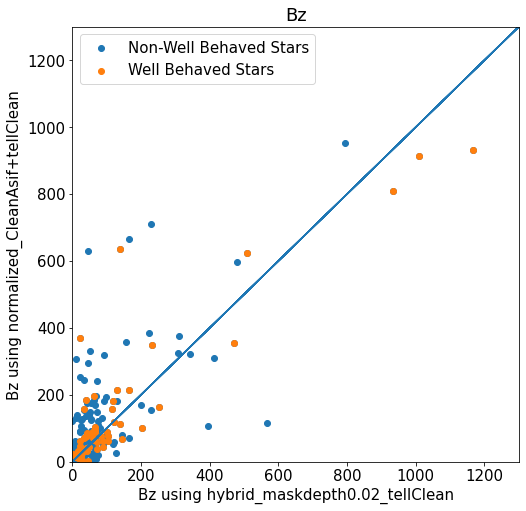

In [129]:
i=1
j=6
model1=pd.read_csv('{}04-Bz-calculations/WellBehavedStars/{}_GOOD.csv'.format(path,models[i]))
#model=pd.read_csv('/content/drive/Shareddrives/BeStarsMiMeS/04-Bz-calculations/{}.csv'.format(models[i]))
v_sig1=np.abs(model1['V bz (G)'])

modelall1=pd.read_csv('{}04-Bz-calculations/{}.csv'.format(path,models[i]))
v_sigall1=np.abs(modelall1['V bz (G)'])

model2=pd.read_csv('{}04-Bz-calculations/WellBehavedStars/{}_GOOD.csv'.format(path,models[j]))
#model=pd.read_csv('/content/drive/Shareddrives/BeStarsMiMeS/04-Bz-calculations/{}.csv'.format(models[i]))
v_sig2=np.abs(model2['V bz (G)'])

modelall2=pd.read_csv('{}04-Bz-calculations/{}.csv'.format(path,models[j]))
v_sigall2=np.abs(modelall2['V bz (G)'])


fig, ax = plt.subplots(1,1, figsize=(8,8))
plt.rcParams.update({'font.size': 15})
ax.scatter(v_sigall1, v_sigall2, label='Non-Well Behaved Stars')
ax.scatter(v_sig1,v_sig2, label='Well Behaved Stars')
ax.plot(v_sigall1,v_sigall1)
ax.legend()
ax.set_xlabel('Bz using {}'.format(models[i]))
ax.set_ylabel('Bz using {}'.format(models[j]))
ax.set_title('Bz'.format(models[i].split('_')[1]))
ax.set_xlim(0,1300)
ax.set_ylim(0,1300)

(0.0, 1300.0)

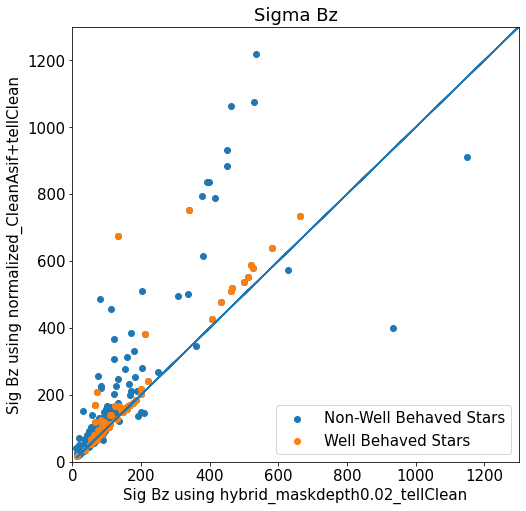

In [130]:
i=1
j=6
model1=pd.read_csv('{}04-Bz-calculations/WellBehavedStars/{}_GOOD.csv'.format(path,models[i]))
#model=pd.read_csv('/content/drive/Shareddrives/BeStarsMiMeS/04-Bz-calculations/{}.csv'.format(models[i]))
v_sig1=np.abs(model1['V bz sig (G)'])

modelall1=pd.read_csv('{}04-Bz-calculations/{}.csv'.format(path,models[i]))
v_sigall1=np.abs(modelall1['V bz sig (G)'])

model2=pd.read_csv('{}04-Bz-calculations/WellBehavedStars/{}_GOOD.csv'.format(path,models[j]))
#model=pd.read_csv('/content/drive/Shareddrives/BeStarsMiMeS/04-Bz-calculations/{}.csv'.format(models[i]))
v_sig2=np.abs(model2['V bz sig (G)'])

modelall2=pd.read_csv('{}04-Bz-calculations/{}.csv'.format(path,models[j]))
v_sigall2=np.abs(modelall2['V bz sig (G)'])


fig, ax = plt.subplots(1,1, figsize=(8,8))
plt.rcParams.update({'font.size': 15})
ax.scatter(v_sigall1, v_sigall2, label='Non-Well Behaved Stars')
ax.scatter(v_sig1,v_sig2, label='Well Behaved Stars')
ax.plot(v_sigall1,v_sigall1)
ax.legend()
ax.set_xlabel('Sig Bz using {}'.format(models[i]))
ax.set_ylabel('Sig Bz using {}'.format(models[j]))
ax.set_title('Sigma Bz'.format(models[i].split('_')[1]))
ax.set_xlim(0,1300)
ax.set_ylim(0,1300)

### All Combinations

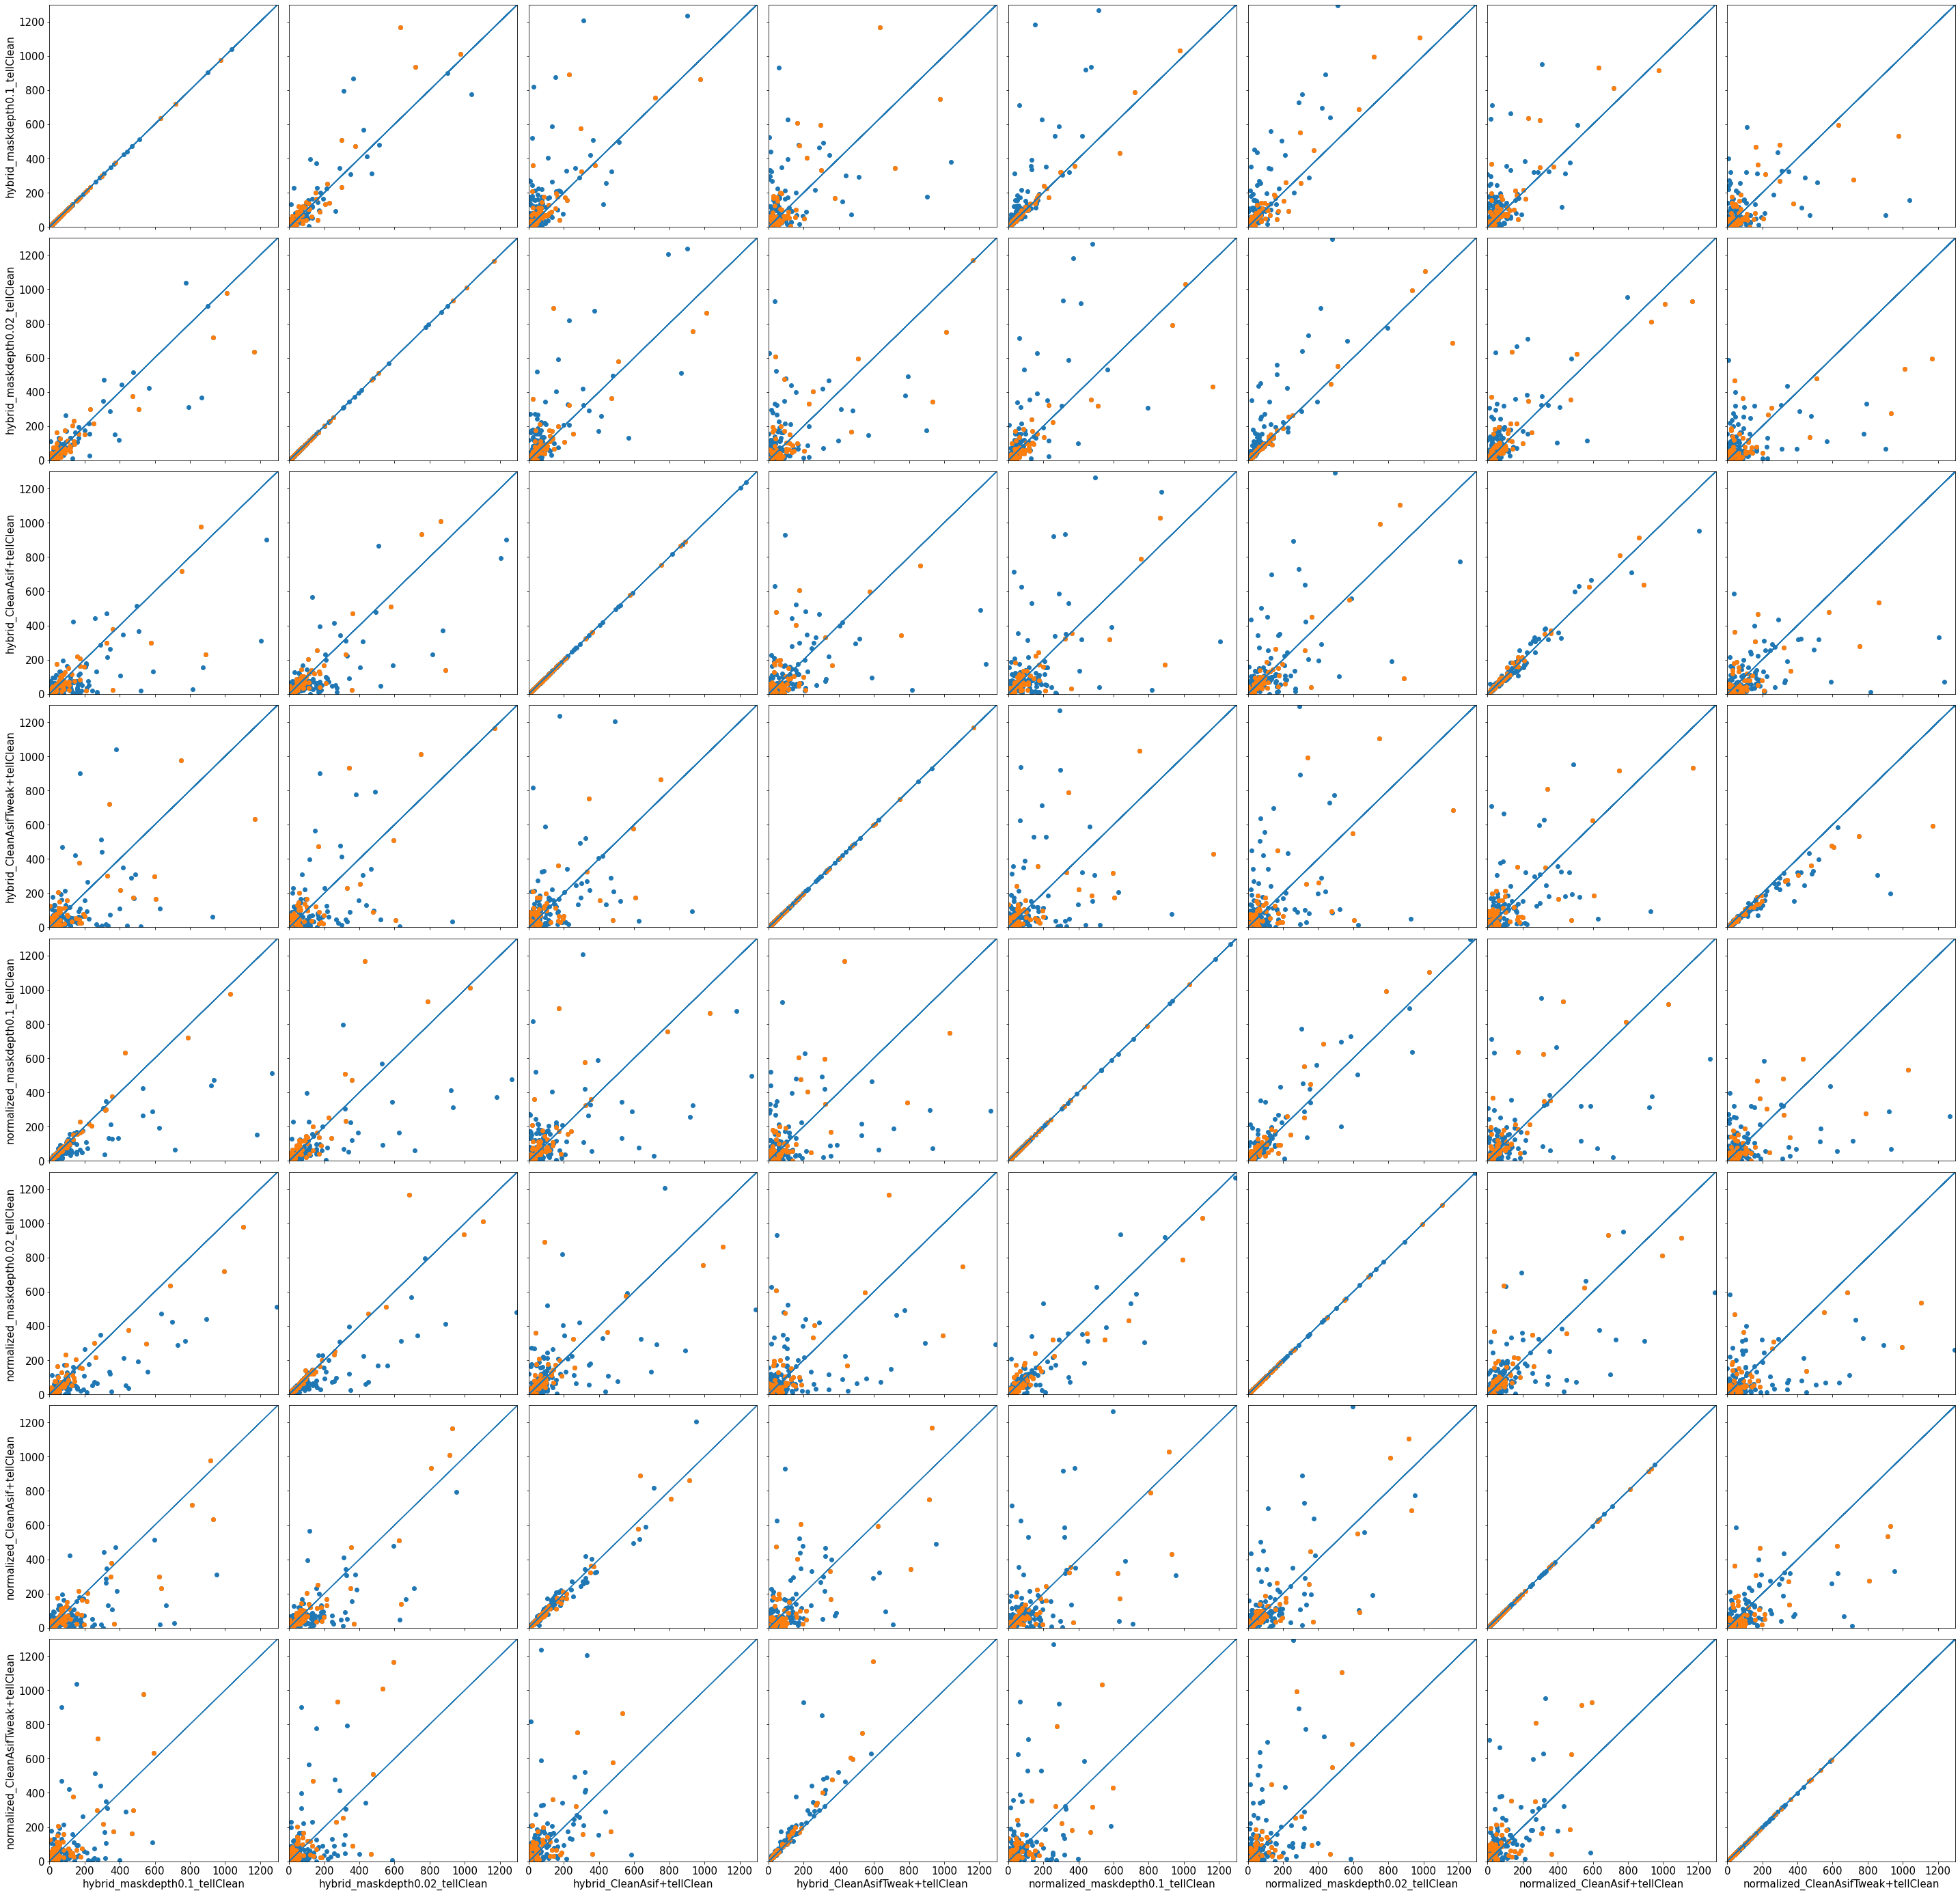

In [116]:
fig, ax = plt.subplots(8,8, figsize=(50,50), sharex=True, sharey=True)
for i in range(8):
    for j in range(8):
        model1=pd.read_csv('{}04-Bz-calculations/WellBehavedStars/{}_GOOD.csv'.format(path,models[i]))
        #model=pd.read_csv('/content/drive/Shareddrives/BeStarsMiMeS/04-Bz-calculations/{}.csv'.format(models[i]))
        v_sig1=np.abs(model1['V bz (G)'])

        modelall1=pd.read_csv('{}04-Bz-calculations/{}.csv'.format(path,models[i]))
        v_sigall1=np.abs(modelall1['V bz (G)'])

        model2=pd.read_csv('{}04-Bz-calculations/WellBehavedStars/{}_GOOD.csv'.format(path,models[j]))
        #model=pd.read_csv('/content/drive/Shareddrives/BeStarsMiMeS/04-Bz-calculations/{}.csv'.format(models[i]))
        v_sig2=np.abs(model2['V bz (G)'])

        modelall2=pd.read_csv('{}04-Bz-calculations/{}.csv'.format(path,models[j]))
        v_sigall2=np.abs(modelall2['V bz (G)'])

        

        ax[i,j].scatter(v_sigall1, v_sigall2, label='All Stars')
        ax[i,j].scatter(v_sig1,v_sig2, label='Well Behaved Stars')
        ax[i,j].plot(v_sigall1,v_sigall1)
        
        #ax[i,j].legend()
        #ax[i,j].set_xlabel('Bz from {}'.format(models[i]))
        #ax[i,j].set_ylabel('Bz from {}'.format(models[j]))
        #ax.set_title('{}'.format(models[i].split('_')[1]))

fig.subplots_adjust(hspace=0.05,wspace=0.05)
ax[0,0].set_xlim(0,1300)
ax[0,0].set_ylim(0,1300)
for i in range(8):
    for j in range(8):
        ax[7,j].set_xlabel('{}'.format(models[j]))
        ax[i,0].set_ylabel('{}'.format(models[i]))

(0.0, 1300.0)

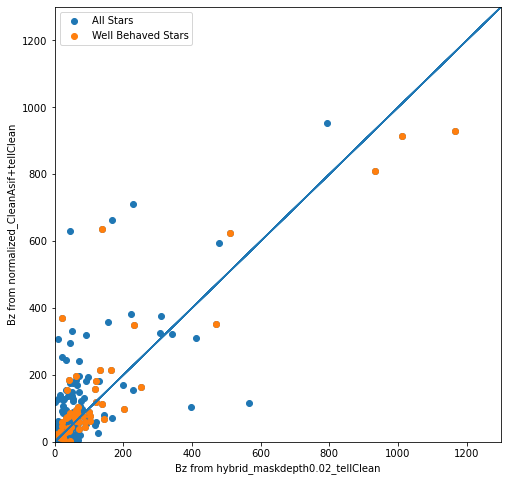

In [64]:
i=1
j=6
model1=pd.read_csv('{}04-Bz-calculations/WellBehavedStars/{}_GOOD.csv'.format(path,models[i]))
#model=pd.read_csv('/content/drive/Shareddrives/BeStarsMiMeS/04-Bz-calculations/{}.csv'.format(models[i]))
v_sig1=np.abs(model1['V bz (G)'])

modelall1=pd.read_csv('{}04-Bz-calculations/{}.csv'.format(path,models[i]))
v_sigall1=np.abs(modelall1['V bz (G)'])

model2=pd.read_csv('{}04-Bz-calculations/WellBehavedStars/{}_GOOD.csv'.format(path,models[j]))
#model=pd.read_csv('/content/drive/Shareddrives/BeStarsMiMeS/04-Bz-calculations/{}.csv'.format(models[i]))
v_sig2=np.abs(model2['V bz (G)'])

modelall2=pd.read_csv('{}04-Bz-calculations/{}.csv'.format(path,models[j]))
v_sigall2=np.abs(modelall2['V bz (G)'])


fig, ax = plt.subplots(1,1, figsize=(8,8))

ax.scatter(v_sigall1, v_sigall2, label='All Stars')
ax.scatter(v_sig1,v_sig2, label='Well Behaved Stars')
ax.plot(v_sigall1,v_sigall1)
ax.legend()
ax.set_xlabel('Bz from {}'.format(models[i]))
ax.set_ylabel('Bz from {}'.format(models[j]))
#ax.set_title('{}'.format(models[i].split('_')[1]))
ax.set_xlim(0,1300)
ax.set_ylim(0,1300)

(0.0, 1300.0)

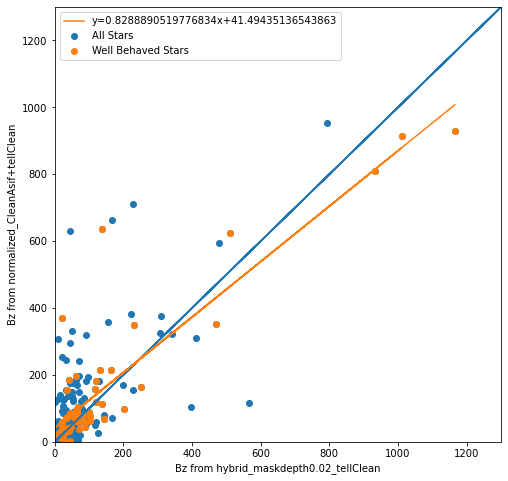

In [74]:
import scipy.stats as sci

fit=sci.linregress(v_sig1,v_sig2)

fig, ax = plt.subplots(1,1, figsize=(8,8))

ax.scatter(v_sigall1, v_sigall2, label='All Stars')
ax.scatter(v_sig1,v_sig2, label='Well Behaved Stars')
ax.plot(v_sigall1,v_sigall1)
ax.plot(v_sig1,fit[0]*v_sig1+fit[1],label='y={}x+{}'.format(fit[0],fit[1]))
ax.legend()
ax.set_xlabel('Bz from {}'.format(models[i]))
ax.set_ylabel('Bz from {}'.format(models[j]))
#ax.set_title('{}'.format(models[i].split('_')[1]))
ax.set_xlim(0,1300)
ax.set_ylim(0,1300)

In [75]:
fit

LinregressResult(slope=0.8288890519776834, intercept=41.49435136543863, rvalue=0.9003517361566521, pvalue=3.670517125162148e-21, stderr=0.05451790787429701, intercept_stderr=14.848116200268754)